In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("Credit card transactions - India - Simple (1).csv")
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475.0
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555.0
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738.0
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424.0
4,4,"Bengaluru, India",05-May-15,Gold,Bills,F,171574.0


In [5]:
df['index'] = range(1, len(df) + 1)
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,1,"Delhi, India",29-Oct-14,Gold,Bills,F,82475.0
1,2,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555.0
2,3,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738.0
3,4,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424.0
4,5,"Bengaluru, India",05-May-15,Gold,Bills,F,171574.0


In [6]:
df['Gender'] = df['Gender'].replace('', 'Unknown').fillna('Unknown')
df['Exp Type'] = df['Exp Type'].replace('', 'Unknown').fillna('Unknown')
df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,1,"Delhi, India",29-Oct-14,Gold,Bills,F,82475.0
1,2,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555.0
2,3,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738.0
3,4,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424.0
4,5,"Bengaluru, India",05-May-15,Gold,Bills,F,171574.0


In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2924\1318743263.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,1,"Delhi, India",2014-10-29,Gold,Bills,F,82475.0
1,2,"Greater Mumbai, India",2014-08-22,Platinum,Bills,F,32555.0
2,3,"Bengaluru, India",2014-08-27,Silver,Bills,F,101738.0
3,4,"Greater Mumbai, India",2014-04-12,Signature,Bills,F,123424.0
4,5,"Bengaluru, India",2015-05-05,Gold,Bills,F,171574.0


In [8]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df = df.dropna(subset=['Amount'])
df.isnull().sum()

index        0
City         0
Date         0
Card Type    0
Exp Type     0
Gender       0
Amount       0
dtype: int64

In [9]:
df['City'] = df['City'].str.replace(', India', '', regex=False).str.strip()
df['City'] = df['City'].replace('Greater Mumbai', 'Mumbai')
df

,index,City,Date,Card Type,Exp Type,Gender,Amount
0,1,Delhi,2014-10-29,Gold,Bills,F,82475.0
1,2,Mumbai,2014-08-22,Platinum,Bills,F,32555.0
2,3,Bengaluru,2014-08-27,Silver,Bills,F,101738.0
3,4,Mumbai,2014-04-12,Signature,Bills,F,123424.0
4,5,Bengaluru,2015-05-05,Gold,Bills,F,171574.0
...,...,...,...,...,...,...,...
26047,26048,Kolkata,2014-06-22,Silver,Travel,F,128191.0
26048,26049,Pune,2014-08-03,Signature,Travel,M,246316.0
26049,26050,Hyderabad,2015-01-16,Silver,Travel,M,265019.0
26050,26051,Kanpur,2014-09-14,Silver,Travel,M,88174.0


In [10]:
!pip install xlrd

In [11]:
import pandas as pd

df_states = pd.read_excel('list_of_cities_and_towns_in_india-834j.xls')

df_states_unique = df_states.drop_duplicates('Name of City', keep='first')

df = df.merge(
    df_states_unique[['Name of City', 'State']], 
    left_on='City', 
    right_on='Name of City', 
    how='left'
)

df.rename(columns={'State': 'State Name'}, inplace=True)
df.drop(columns=['Name of City'], inplace=True)

df['State Name'] = df['State Name'].fillna('Unknown')

df.head()

,index,City,Date,Card Type,Exp Type,Gender,Amount,State Name
0,1,Delhi,2014-10-29,Gold,Bills,F,82475.0,Delhi
1,2,Mumbai,2014-08-22,Platinum,Bills,F,32555.0,Maharashtra
2,3,Bengaluru,2014-08-27,Silver,Bills,F,101738.0,Karnataka
3,4,Mumbai,2014-04-12,Signature,Bills,F,123424.0,Maharashtra
4,5,Bengaluru,2015-05-05,Gold,Bills,F,171574.0,Karnataka


In [12]:
manual_city_map = {
    'Shikarpur Bulandshahr': 'Uttar Pradesh',
    'Navi Mumbai': 'Maharashtra',
    'Shamsabad Agra': 'Uttar Pradesh',
    'Suar': 'Uttar Pradesh',
    'Sankarankoil': 'Tamil Nadu',
    'Vijainagar Ajmer': 'Rajasthan',
    'Bhabua': 'Bihar',
    'Alipurduar': 'West Bengal',
    'Hardoi': 'Uttar Pradesh',
    'Shahabad Rampur': 'Uttar Pradesh',
    'Shahabad Hardoi': 'Uttar Pradesh',
    'Pandua': 'West Bengal',
    'Kathua': 'Jammu and Kashmir'
}

for city, state in manual_city_map.items():
    df.loc[(df['State Name'] == 'Unknown') & (df['City'] == city), 'State Name'] = state

## Q1 : Which city and state have the highest average transaction amount

In [47]:
city_state_avg = (
    df.groupby(['City','State Name'])['Amount']
    .mean()
    .reset_index()
    .sort_values(by='Amount', ascending=False)
)


city_state_avg.head(1)

,City,State Name,Amount
862,Thodupuzha,Kerala,296684.0


## Q2: What percentage of transactions fall into each category 

Exp Type
Food             20.967742
Fuel             20.168971
Bills            19.504608
Entertainment    18.275730
Grocery          18.241167
Travel            2.834101
Unknown           0.007680
Name: proportion, dtype: float64


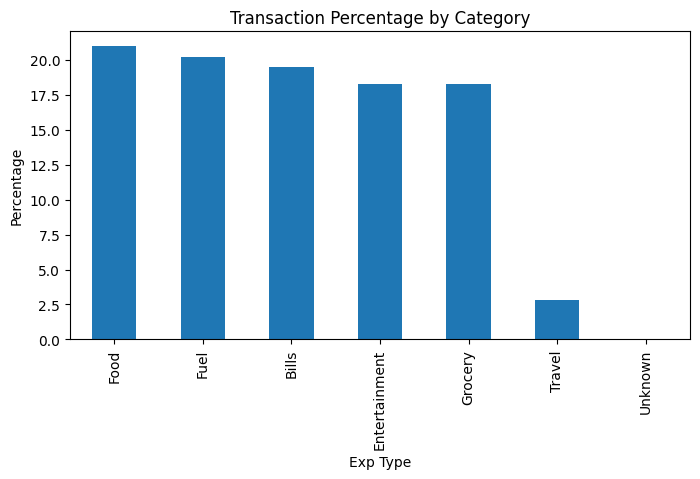

In [14]:
category_pct = (
    df['Exp Type']
    .value_counts(normalize=True) * 100
)

print(category_pct)
category_pct.plot(kind='bar', figsize=(8,4))
plt.ylabel("Percentage")
plt.title("Transaction Percentage by Category")
plt.show()


## Q3: Which day of the week records the highest total spending?

In [34]:
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfWeek'] = df['Date'].dt.day_name()
day_spending = (
    df.groupby('DayOfWeek')['Amount']
    .sum()
    .sort_values(ascending=False)
)

top_day = day_spending.idxmax()
top_value_m = day_spending.max() / 1e6

print(f"{top_day}: {top_value_m:.2f} M")


Sunday: 596.60 M


## Q4: Which Card Type shows the highest spending concentration risk across cities?

In [15]:
card_city_spread = (
    df.groupby(['Card Type', 'City'])['Amount']
    .sum()
    .reset_index()
)

risk = (
    card_city_spread
    .groupby('Card Type')['Amount']
    .std()
    .sort_values(ascending=False)
)

risk

Card Type
Silver       1.150457e+07
Signature    1.031393e+07
Platinum     1.026358e+07
Gold         1.013379e+07
Name: Amount, dtype: float64

## Q5: Do male or female customers have higher total spending?

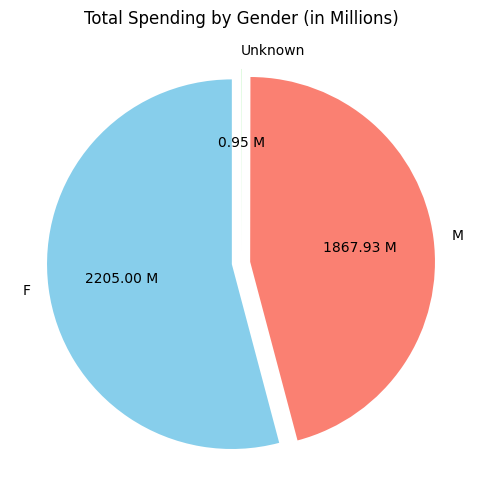

In [32]:
import matplotlib.pyplot as plt

labels = gender_spending_M.index
sizes = gender_spending_M.values
explode = [0.05] * len(labels)

plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f"{p/100*sum(sizes):.2f} M",  # show only actual value
    colors=['skyblue', 'salmon', 'lightgreen', 'orange'][:len(labels)],
    startangle=90,
    explode=explode
)
plt.title('Total Spending by Gender (in Millions)')
plt.show()


## Q6: What is the distribution of transaction amounts — identify outliers?

In [18]:
mean_val = df['Amount'].mean()
median_val = df['Amount'].median()
skewness = df['Amount'].skew()

print(f"--- Distribution Analysis ---")
print(f"Mean (Average): {mean_val:.2f}")
print(f"Median (Middle Value): {median_val:.2f}")
print(f"Skewness: {skewness:.2f}")

if mean_val > median_val:
    print("\nInsight: The distribution is Right-Skewed (Positively Skewed).")
else:
    print("\nInsight: The distribution is nearly Symmetrical.")

Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]

print(f"--- Outlier Detection Summary ---")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print(f"Total number of outliers found: {len(outliers)}")

--- Distribution Analysis ---
Mean (Average): 156446.83
Median (Middle Value): 153127.00
Skewness: 1.76

Insight: The distribution is Right-Skewed (Positively Skewed).
--- Outlier Detection Summary ---
Lower Bound: -149302.50
Upper Bound: 454513.50
Total number of outliers found: 230


## Q7: Which state shows the highest variability in transaction amounts across different card types.”

In [19]:
state_card_avg = (
    df.groupby(['State Name', 'Card Type'])['Amount']
    .mean()
    .reset_index()
)

state_variability = (
    state_card_avg
    .groupby('State Name')['Amount']
    .std()
    .sort_values(ascending=False)
)

print("State with highest spending variability across card types:")
print(state_variability.head(1))

State with highest spending variability across card types:
State Name
Manipur    99932.073464
Name: Amount, dtype: float64


## How frequently do customers transact in different cities?

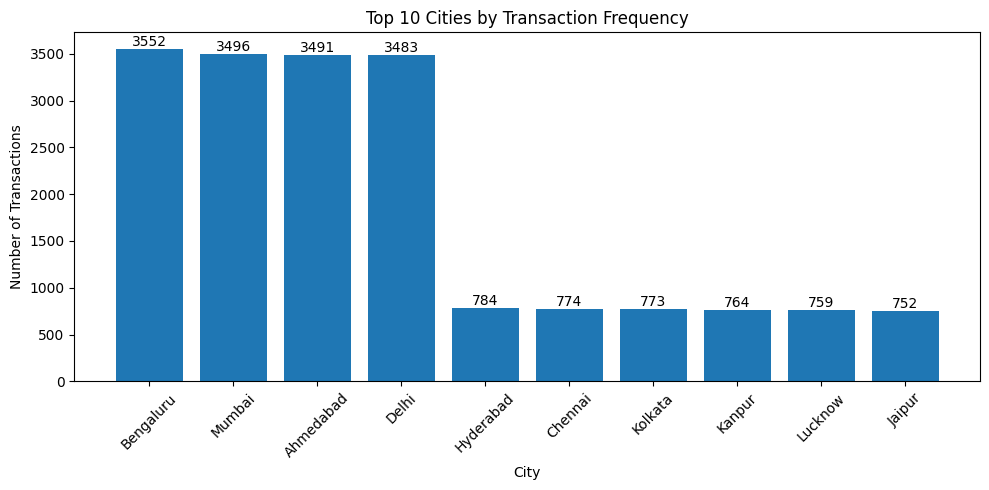

In [18]:

city_frequency = (
    df.groupby('City')
      .size()
      .reset_index(name='Transaction_Count')
      .sort_values(by='Transaction_Count', ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
bars = plt.bar(city_frequency['City'], city_frequency['Transaction_Count'])

plt.xticks(rotation=45)
plt.xlabel("City")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Cities by Transaction Frequency")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()


## Are premium card holder making fewer but higher value transaction?

In [23]:
card_analysis = (
    df.groupby('Card Type')['Amount']
      .agg(
          Transaction_Count='count',
          Avg_Transaction_Value='mean'
      )
      .sort_values(by='Avg_Transaction_Value', ascending=False)
)

print("Analysis of Transaction Frequency vs Value by Card Type:")
print(card_analysis)

Analysis of Transaction Frequency vs Value by Card Type:
           Transaction_Count  Avg_Transaction_Value
Card Type                                          
Platinum                6395          157600.461923
Signature               6442          157167.470661
Silver                  6838          156373.327289
Gold                    6365          154637.360251


# Essential vs Other Spending

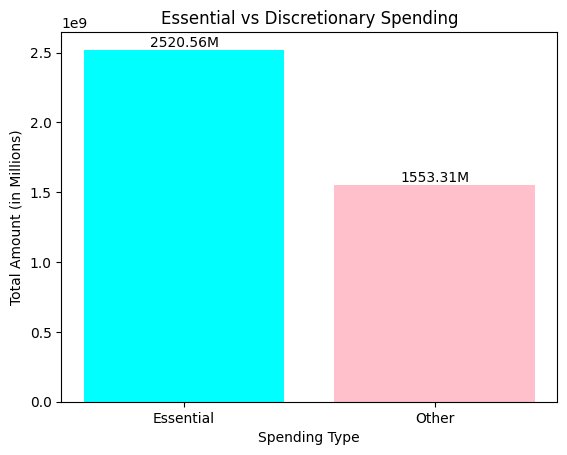

In [48]:
import matplotlib.pyplot as plt

essential = ['Bills', 'Fuel', 'Food']
df['Spend_Type'] = df['Exp Type'].apply(lambda x: 'Essential' if x in essential else 'Other')

spend_type = df.groupby('Spend_Type')['Amount'].sum()

plt.figure()
bars = plt.bar(spend_type.index, spend_type.values, color=['cyan', 'pink'])

for i, value in enumerate(spend_type.values):
    plt.text(i, value, f'{value/1e6:.2f}M', ha='center', va='bottom')  # divide by 1e6 and add 'M'

plt.title("Essential vs Discretionary Spending")
plt.xlabel("Spending Type")
plt.ylabel("Total Amount (in Millions)")

plt.show()

# Mid-Tier Card Dominance (Volume + Value)

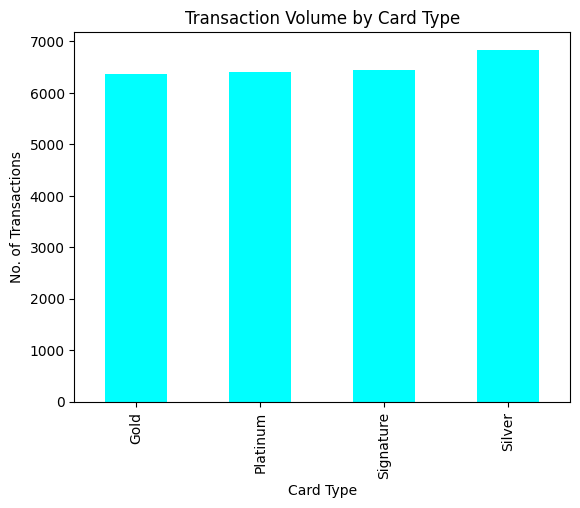

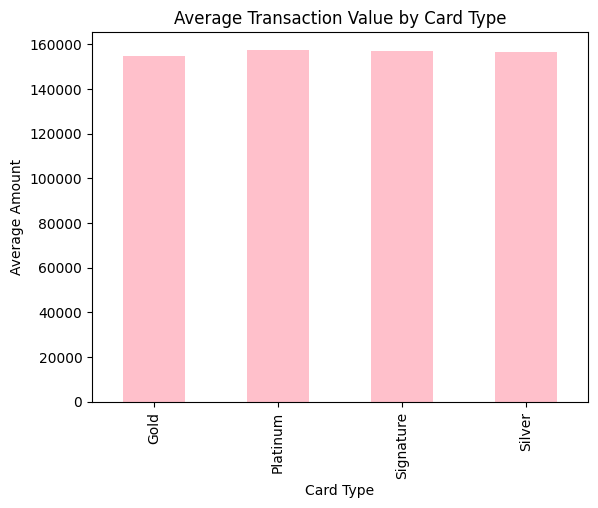

In [49]:
card_volume = df.groupby('Card Type')['Amount'].count()
card_avg = df.groupby('Card Type')['Amount'].mean()

plt.figure()
card_volume.plot(kind='bar',color='cyan')
plt.title("Transaction Volume by Card Type")
plt.xlabel("Card Type")
plt.ylabel("No. of Transactions")
plt.show()

plt.figure()
card_avg.plot(kind='bar',color='pink')
plt.title("Average Transaction Value by Card Type")
plt.xlabel("Card Type")
plt.ylabel("Average Amount")
plt.show()


# Risk Concentration in Few Segments

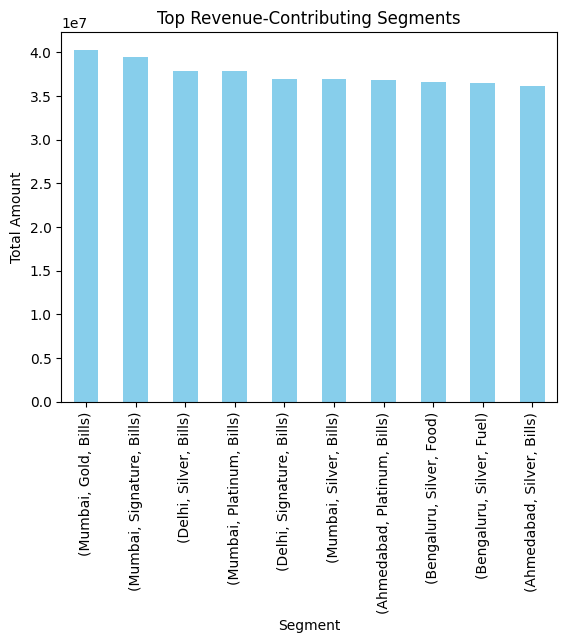

In [50]:
segment_spend = df.groupby(['City','Card Type','Exp Type'])['Amount'].sum()
top_segments = segment_spend.sort_values(ascending=False).head(10)

plt.figure()
top_segments.plot(kind='bar',color='skyblue')
plt.title("Top Revenue-Contributing Segments")
plt.xlabel("Segment")
plt.ylabel("Total Amount")
plt.show()


# High Volume vs High Value Split

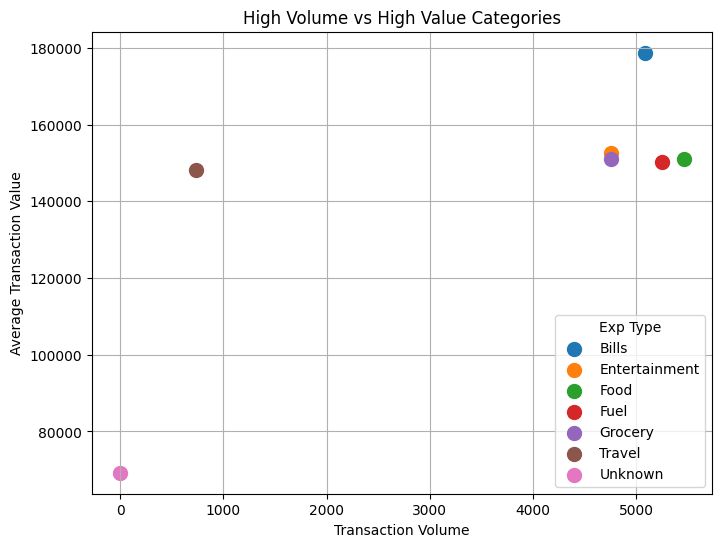

In [45]:
vol_val = df.groupby('Exp Type').agg(
    Volume=('Amount','count'),
    Avg_Value=('Amount','mean')
)

plt.figure(figsize=(8,6))

colors = plt.cm.tab10(range(len(vol_val)))

for i, exp_type in enumerate(vol_val.index):
    plt.scatter(
        vol_val.loc[exp_type, 'Volume'],
        vol_val.loc[exp_type, 'Avg_Value'],
        color=colors[i],
        label=exp_type,
        s=100
    )

plt.xlabel("Transaction Volume")
plt.ylabel("Average Transaction Value")
plt.title("High Volume vs High Value Categories")
plt.legend(title="Exp Type")
plt.grid(True)
plt.show()


In [24]:
df.to_csv('final_credit_card.csv')